In [1]:
from pathlib import Path
from src.loading import load_dataset_subset

# 1) Cargar dataset MIXED (50% limpio / 50% sucio sintético)
subset_mixed = load_dataset_subset(
    base_dir=r"C:\Users\bianc\Vision\tpf\DETRAC_mixed_50_50",
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=True,
)

mixed_image_paths = subset_mixed["image_paths"]
mixed_label_paths = subset_mixed["label_paths"]

print("DETRAC_mixed_50_50 -> imágenes:", len(mixed_image_paths))


# 2) Cargar dataset ARCHIVE (sucio real)
archive_subset = load_dataset_subset(
    base_dir=r"C:\Users\bianc\Vision\tpf\archive",
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=True,
)

archive_image_paths = archive_subset["image_paths"]
archive_label_paths = archive_subset["label_paths"]

print("archive -> imágenes:", len(archive_image_paths))


Total imágenes en all: 3262 | Usando: 3262 (100.0%)
DETRAC_mixed_50_50 -> imágenes: 3262
Total imágenes en all: 1027 | Usando: 1027 (100.0%)
archive -> imágenes: 1027


In [2]:
from src.preprocessing import (
    clahe_bgr,
    smooth_median_bilateral,
    unsharp_mask,
    preproc_clahe,
    preproc_clahe_unsharp,
    preproc_smooth_unsharp,
    generate_preprocessed_dataset,
)

from pathlib import Path

# Definimos los métodos de preprocesamiento que vamos a usar
preproc_methods = {
    "clahe": preproc_clahe,                              # solo CLAHE
    "smooth": smooth_median_bilateral,                   # median + bilateral
    "unsharp": lambda img: unsharp_mask(img, amount=1.0),# solo unsharp
    "clahe_unsharp": preproc_clahe_unsharp,              # CLAHE + unsharp
    "smooth_unsharp": preproc_smooth_unsharp,            # smooth + unsharp
}

base_out = Path(r"C:\Users\bianc\Vision\tpf\preproc_datasets")

# Diccionarios para guardar las rutas de imágenes generadas por cada método
mixed_preproc_paths = {}
archive_preproc_paths = {}

for name, fn in preproc_methods.items():
    print(f"\n=== Generando preprocesado: {name} ===")

    # 1) MIXED
    out_mixed = base_out / f"mixed_{name}"
    mixed_imgs_proc, mixed_lbls_proc = generate_preprocessed_dataset(
        image_paths=mixed_image_paths,
        label_paths=mixed_label_paths,
        output_base_dir=out_mixed,
        preproc_fn=fn,
        suffix=name
    )
    mixed_preproc_paths[name] = mixed_imgs_proc
    print(f"  MIXED -> {len(mixed_imgs_proc)} imágenes preprocesadas en {out_mixed}")

    # 2) ARCHIVE
    out_archive = base_out / f"archive_{name}"
    archive_imgs_proc, archive_lbls_proc = generate_preprocessed_dataset(
        image_paths=archive_image_paths,
        label_paths=archive_label_paths,
        output_base_dir=out_archive,
        preproc_fn=fn,
        suffix=name
    )
    archive_preproc_paths[name] = archive_imgs_proc
    print(f"  ARCHIVE -> {len(archive_imgs_proc)} imágenes preprocesadas en {out_archive}")

print("\nListo, se generaron todos los datasets preprocesados.")



=== Generando preprocesado: clahe ===
  MIXED -> 3262 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\mixed_clahe
  ARCHIVE -> 1027 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\archive_clahe

=== Generando preprocesado: smooth ===
  MIXED -> 3262 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\mixed_smooth
  ARCHIVE -> 1027 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\archive_smooth

=== Generando preprocesado: unsharp ===
  MIXED -> 3262 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\mixed_unsharp
  ARCHIVE -> 1027 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\archive_unsharp

=== Generando preprocesado: clahe_unsharp ===
  MIXED -> 3262 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\mixed_clahe_unsharp
  ARCHIVE -> 1027 imágenes preprocesadas en C:\Users\bianc\Vision\tpf\preproc_datasets\archive_clahe_unsharp

=== Generando prep

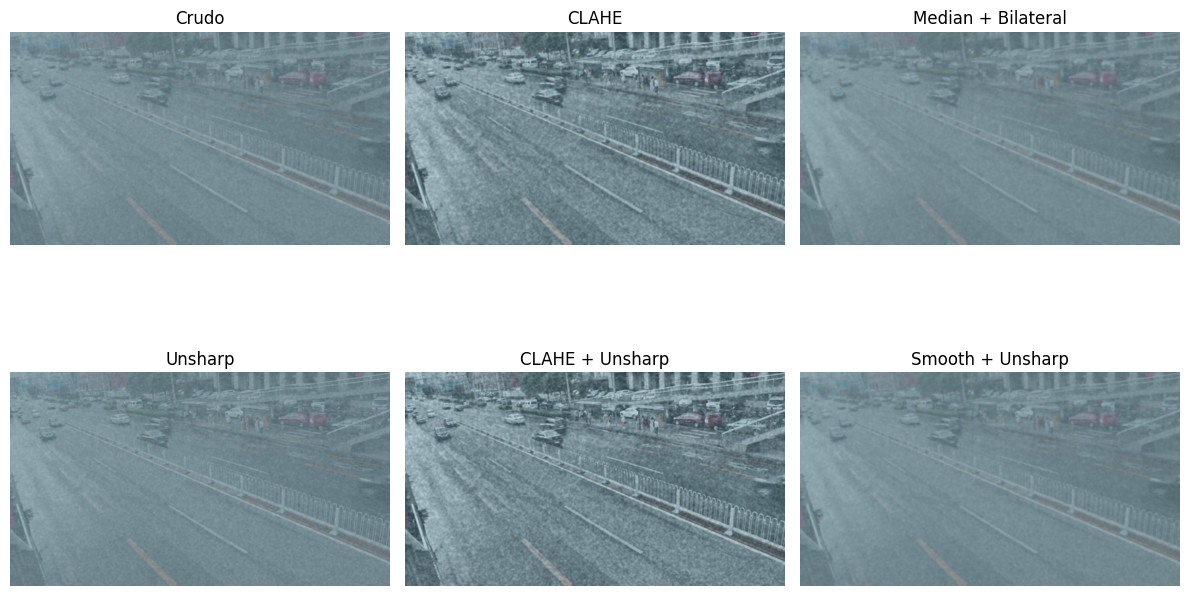

Imagen base: C:\Users\bianc\Vision\tpf\DETRAC_mixed_50_50\images\MVI_40162_img00637_dirty.jpg


In [3]:
import cv2
import matplotlib.pyplot as plt

from src.preprocessing import (
    clahe_bgr,
    smooth_median_bilateral,
    unsharp_mask,
    preproc_clahe,
    preproc_clahe_unsharp,
    preproc_smooth_unsharp,
)

# Elegimos una imagen del mixed (podés cambiar el índice)
img_path = mixed_image_paths[0]
img_bgr = cv2.imread(str(img_path))
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Aplicamos los distintos preprocesamientos
img_clahe = cv2.cvtColor(preproc_clahe(img_bgr), cv2.COLOR_BGR2RGB)
img_smooth = cv2.cvtColor(smooth_median_bilateral(img_bgr), cv2.COLOR_BGR2RGB)
img_unsharp = cv2.cvtColor(unsharp_mask(img_bgr, amount=1.0), cv2.COLOR_BGR2RGB)
img_clahe_un = cv2.cvtColor(preproc_clahe_unsharp(img_bgr), cv2.COLOR_BGR2RGB)
img_smooth_un = cv2.cvtColor(preproc_smooth_unsharp(img_bgr), cv2.COLOR_BGR2RGB)

# Armamos la figura 2x3: crudo + 5 variantes
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

axes[0].imshow(img_rgb)
axes[0].set_title("Crudo")
axes[1].imshow(img_clahe)
axes[1].set_title("CLAHE")
axes[2].imshow(img_smooth)
axes[2].set_title("Median + Bilateral")
axes[3].imshow(img_unsharp)
axes[3].set_title("Unsharp")
axes[4].imshow(img_clahe_un)
axes[4].set_title("CLAHE + Unsharp")
axes[5].imshow(img_smooth_un)
axes[5].set_title("Smooth + Unsharp")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()
print("Imagen base:", img_path)


In [4]:
from src.training import create_yolo_subset_config
from typing import Dict
from pathlib import Path

# Cargar imágenes del dataset preprocesado MIXED-CLAHE desde disco
mixed_clahe_dir = Path(r"C:\Users\bianc\Vision\tpf\preproc_datasets\mixed_clahe")
subset_mixed_clahe = load_dataset_subset(
    base_dir=str(mixed_clahe_dir),
    split=None,
    images_subdir="images",
    labels_subdir="labels",
    percent=100.0,
    shuffle=True
)

mixed_clahe_images = subset_mixed_clahe["image_paths"]

# Diccionario de clases de UA-DETRAC
UA_DETRAC_CLASS_NAMES: Dict[int, str] = {
    0: "others",
    1: "car",
    2: "van",
    3: "bus",
}

yaml_mixed_clahe = Path(r"C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe.yaml")

yaml_path, train_txt, val_txt = create_yolo_subset_config(
    image_paths=mixed_clahe_images,
    yaml_path=yaml_mixed_clahe,
    class_names=UA_DETRAC_CLASS_NAMES,
    train_ratio=0.8,
)

print("YAML preprocesado (MIXED-CLAHE) creado:")
print("yaml:", yaml_path)
print("train:", train_txt)
print("val:", val_txt)

Total imágenes en all: 3262 | Usando: 3262 (100.0%)
Config YOLO creada:
  YAML:   C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe.yaml
  train:  C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe_train.txt (2609 imágenes)
  val:    C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe_val.txt (653 imágenes)
YAML preprocesado (MIXED-CLAHE) creado:
yaml: C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe.yaml
train: C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe_train.txt
val: C:\Users\bianc\Vision\tpf\configs\detrac_mixed_clahe_val.txt
